In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv



# 1. Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import spearmanr
import plotly.express as px
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 2. EDA - Exploratory Data Analysis

# 2.1. Dataset Loading and Initial Review

In [5]:
# Read File Path
file_path = "/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv"
df = pd.read_csv(file_path) 






I have successfully added my selected dataset using the **"Add Input"** button, and I am reading it from the file path using the **Pandas** library.

**NOTE**: When obtaining the file path, follow these steps:
1. Click on the `.csv` file under the **"Datasets"** heading on the right side of the interface.
2. The file will open in the lower tab.
3. Here, you will find the button to **copy the file path**. 

This is the path that can be used to read the dataset in your code.
.

In [44]:
df.shape

(40000, 25)



The `df.shape` attribute provides the dimensions of a DataFrame in the form of a tuple:

- **First Value**: Represents the number of rows.
- **Second Value**: Represents the number of columns.

In [45]:
# Info for dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Dataset Summary:
#### DataFrame Information

The dataset contains a total of 40,000 rows and 25 columns.
- **Data Types**:
  - 3 columns of **int64** (integer type),
  - 1 column of **float64** (floating-point type),
  - 21 columns of **object** (categorical or text data).

#### Columns and Data Features
#### General Characteristics:
- Some columns have missing values (e.g., Malware Indicators, Proxy Information).
- The majority of columns are of object type, meaning categorical analysis and data cleaning may be necessary.

  
**Note**: Data preprocessing for missing values and appropriate encoding for categorical columns may be necessary for analysis.

# 2.2. Numerical Columns Review

In [46]:
#Get a basic statistical overview of numerical columns
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


### Summary Analysis:

**General Distribution**:  
Network traffic mostly consists of medium-sized packets (approximately 781 bytes), with source and destination ports typically ranging between 30,000 and 50,000, showing a noticeable concentration.

**Normal Traffic**:  
Most of the traffic appears normal, as the majority of anomaly scores are below 50 (average = 50.11), with the minimum anomaly score being 0.

**Anomalies**:  
Anomaly scores can occasionally reach very high values (up to 100). This could be an indication of potential security threats or unusual activities within the network.

### Conclusion:  
By performing this analysis, you can effectively detect anomalous activities in your network traffic. This data can be valuable for network security monitoring, anomaly detection, and performance optimization.
timization.

# 2.2.1. Visualization of Numerical Values

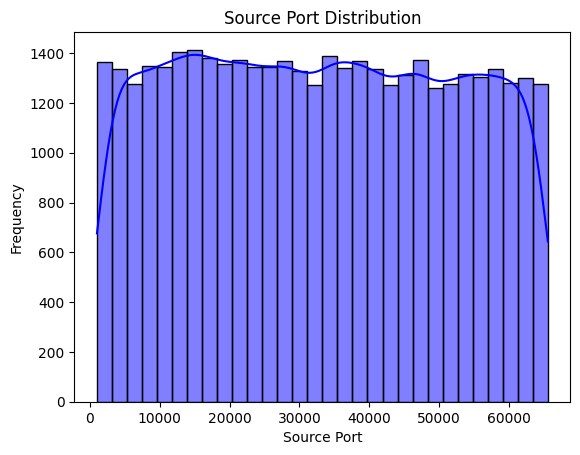

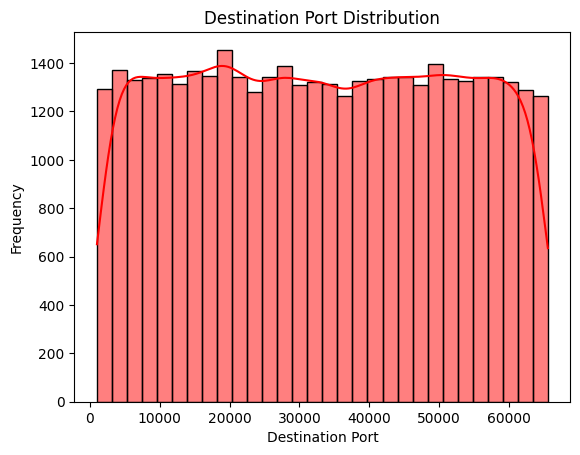

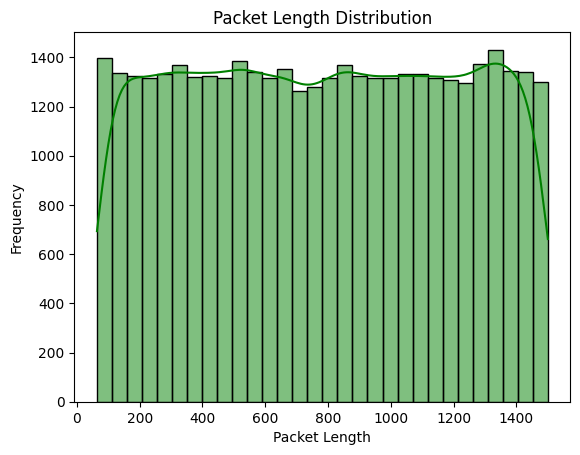

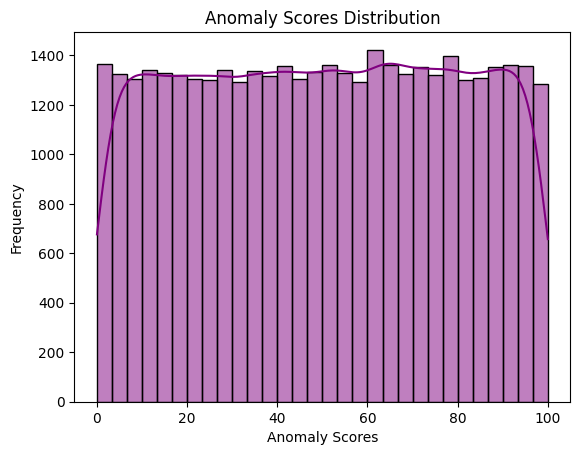

In [47]:

# Visualize your data with histograms
sns.histplot(df['Source Port'], kde=True, color='blue', bins=30)
plt.title('Source Port Distribution')
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['Destination Port'], kde=True, color='red', bins=30)
plt.title('Destination Port Distribution')
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['Packet Length'], kde=True, color='green', bins=30)
plt.title('Packet Length Distribution')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['Anomaly Scores'], kde=True, color='purple', bins=30)
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.show()


In [48]:

warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

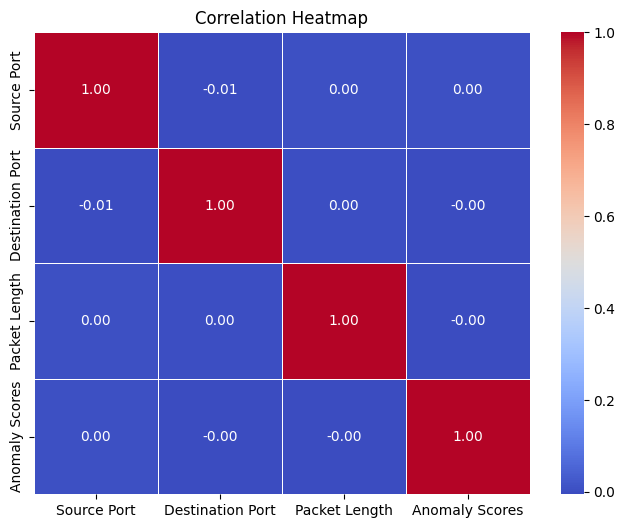

In [49]:
# Calculate and visualize the correlation matrix
correlation_matrix = df[['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']].corr()

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

According to this correlation matrix:

There is no strong linear relationship between the data. It is observed that variables such as Packet Length and Anomaly Scores are independent of each other.
According to the correlation analysis results, since the relationships between these variables are limited in modeling or analysis, it may be useful to examine the effects of other features or to derive different features.

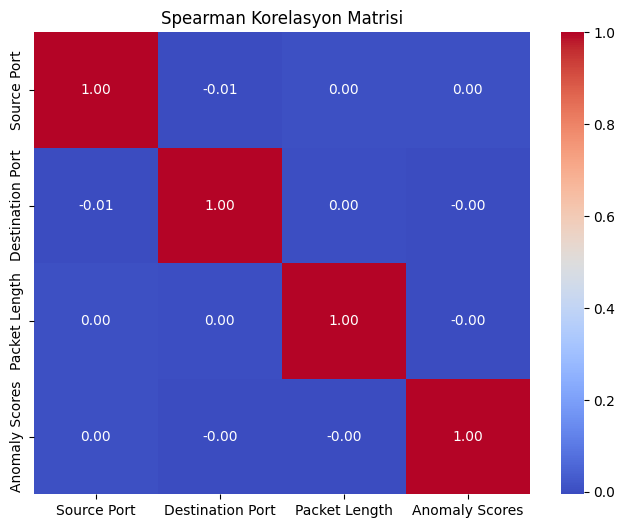

In [50]:
# Spearman korelasyonu hesaplama
spearman_correlation = df[['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']].corr(method='spearman')

# Korelasyon matrisini görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Korelasyon Matrisi")
plt.show()

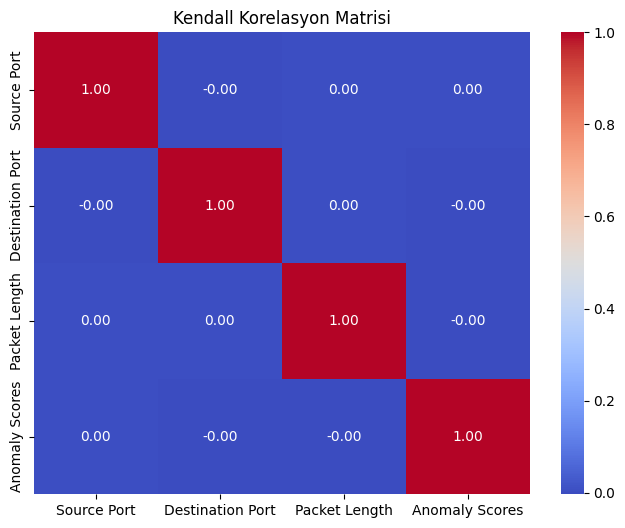

In [51]:
# Kendall korelasyonu hesaplama
kendall_correlation = df[['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']].corr(method='kendall')

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Kendall Korelasyon Matrisi")
plt.show()

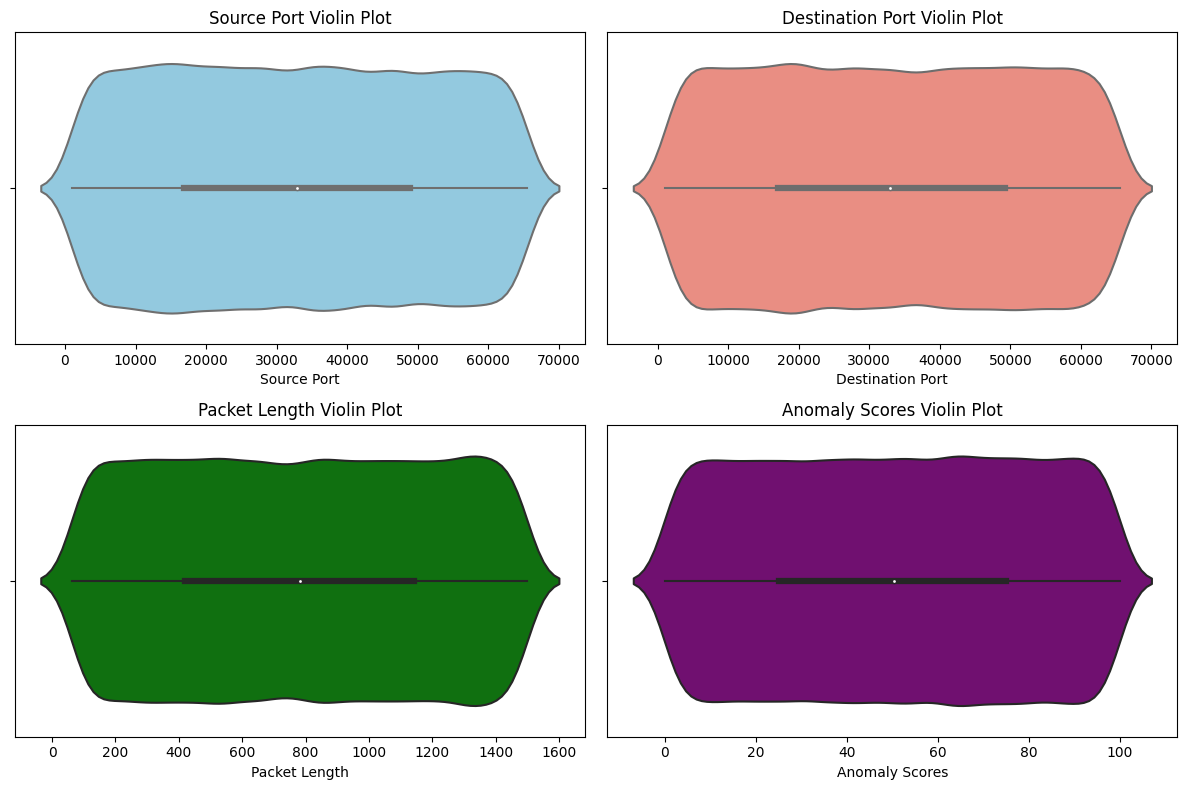

In [52]:
# Violin plot'ları çizme
plt.figure(figsize=(12, 8))

# Source Port
plt.subplot(2, 2, 1)
sns.violinplot(x=df['Source Port'], color='skyblue')
plt.title('Source Port Violin Plot')

# Destination Port
plt.subplot(2, 2, 2)
sns.violinplot(x=df['Destination Port'], color='salmon')
plt.title('Destination Port Violin Plot')

# Packet Length
plt.subplot(2, 2, 3)
sns.violinplot(x=df['Packet Length'], color='green')
plt.title('Packet Length Violin Plot')

# Anomaly Scores
plt.subplot(2, 2, 4)
sns.violinplot(x=df['Anomaly Scores'], color='purple')
plt.title('Anomaly Scores Violin Plot')

plt.tight_layout()
plt.show()


General Comment:
Source Port and Destination Port variables show similar distributions, which may indicate that these two variables may be related or have the same type of data structure.
Packet Length has a narrower density range, which may indicate that more consistent packet lengths are used.
Anomaly Scores has a wide distribution, so this variable may cover different possible anomaly types.

# 2.3. Object Columns Review

In [53]:
# Finding columns of Object data type
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)


Index(['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


# 2.3.1. Object Columns Uniqueness Analysis

In [54]:
# See the unique values ​​and number of values ​​for each column of type Object
for col in object_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")


Column: Timestamp
Timestamp
2022-06-11 14:28:15    2
2022-06-06 12:12:43    2
2022-04-17 20:05:34    2
2023-05-30 06:33:58    1
2021-01-11 23:03:29    1
                      ..
2022-01-27 11:03:06    1
2020-10-23 03:26:01    1
2020-12-17 14:28:29    1
2022-06-23 07:20:25    1
2023-10-10 11:59:52    1
Name: count, Length: 39997, dtype: int64


Column: Source IP Address
Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
                  ..
8.73.26.79         1
15.232.18.232      1
71.157.156.214     1
200.15.203.154     1
14.102.21.108      1
Name: count, Length: 40000, dtype: int64


Column: Destination IP Address
Destination IP Address
84.9.164.252       1
131.248.231.186    1
48.157.39.218      1
112.135.140.167    1
125.252.191.10     1
                  ..
46.159.49.250      1
186.100.212.78     1
168.135.234.183    1
22.16.168.57       1
109.198.45.7       1
Name: count, Length: 40000, dtype: int64


Column: 

# a)Unique Object Analysis

When examining the data, we observed the following:

### **Column: Timestamp**
- **Unique Values**: 39,997  
- **Meaning**: Each record likely represents a different event in the dataset, making this important for time-based analysis.

### **Column: Source IP Address** and **Column: Destination IP Address**
- **Unique Values**: Approximately 40,000 for each
- **Meaning**: These columns exhibit high cardinality, indicating that each entry refers to a different source and destination. This is typical in network traffic data, where IP addresses are unique.

### **Column: Payload Data**
- **Unique Values**: 40,000  
- **What it means**: The uniqueness of the payloads suggests that the data may be granular or unstructured, requiring further analysis.

### **Column: Geo-location Data**
- **Unique Locations**: 8,723  
- **Meaning**: The data contains a variety of geographical locations with many unique values, indicating diverse geographic sources. Geo-location can be used to analyze the distribution of events across regions.

### **Column: User Information**
- **Unique Users**: 32,389  
- **Meaning**: A high number of unique user entries suggests a large diversity in users. This could be important for user-level analysis or behavior tracking.

### **Column: Device Information**
- **Unique Devices**: 32,104  
- **Meaning**: The device information column contains many unique values, indicating a wide variety of devices accessing the data. This can be used to identify trends in device usage or behavior patterns.

### **Summary**:
The dataset contains several columns with high cardinality (unique values), especially in columns like **Timestamp**, **Source IP Address**, **Destination IP Address**, **Payload Data**, **Geo-location Data**, **User Information**, and **Device Information**. These unique entries indicate granular, event-based data, which is crucial for identifying patterns and anomalies. However, high cardinality also suggests that preprocessing may be needed to group or simplify features for more efficient downstream analysis.
nstream analysis.

# b)Balanced Object Analysis

When examining the dataset's balanced columns, we observe the following distributions:

### **Column: Log Source**
The log sources in the dataset are as follows:
- **Firewall**: 20,116 occurrences
- **Server**: 19,884 occurrences

**What it implies**:  
The dataset includes a nearly equal number of logs from **Firewall** and **Server**, reflecting a balanced representation of network security and server-side activities. This balance ensures that both defensive and operational aspects of the network are captured.

---

### **Column: Network Segment**
The network segments are distributed as follows:
- **Segment C**: 13,408 occurrences
- **Segment B**: 13,319 occurrences
- **Segment A**: 13,273 occurrences

**What it implies**:  
The dataset shows a well-distributed mix of network segments, suggesting that data is being gathered from different parts of the network. This diversity is useful for analyzing segment-specific behaviors and vulnerabilities.

---

### **Column: Attack Type**
The distribution of attack types is as follows:
- **DDoS**: 13,428 occurrences
- **Malware**: 13,307 occurrences
- **Intrusion**: 13,265 occurrences

**What it implies**:  
There is an even spread of attack types, with slight variations. This balance ensures that the dataset represents a wide variety of attack scenarios, which is valuable for developing security models that can identify multiple types of cyber threats.

---

### **Column: Attack Signature**
The distribution of attack signatures is:
- **Known Pattern A**: 20,076 occurrences
- **Known Pattern B**: 19,924 occurrences

**What it implies**:  
The attack signatures show a slight preference for **Known Pattern A**, but they remain fairly balanced overall. This suggests that while certain attack patterns may be more prevalent, both patterns are important for identifying and mitigating different attack vectors.

---

### **Column: Action Taken**
The recorded actions taken are distributed as follows:
- **Blocked**: 13,529 occurrences
- **Ignored**: 13,276 occurrences
- **Logged**: 13,195 occurrences

**What it implies**:  
The actions taken by the system—**Blocked**, **Ignored**, and **Logged**—are nearly equally represented. This indicates a well-rounded response strategy, offering a mix of proactive measures (blocked), passive measures (logged), and areas that are left unaddressed (ignored).

---

### **Column: Severity Level**
The severity levels are distributed as follows:
- **Medium**: 13,435 occurrences
- **High**: 13,382 occurrences
- **Low**: 13,183 occurrences

**What it implies**:  
The severity levels are relatively balanced, with slightly more medium and high-severity incidents. This balance allows for the development of models that prioritize incidents effectively based on risk and threat level.

---

### **Column: Protocol**
The dataset's protocols are distributed as:
- **ICMP**: 13,429 occurrences
- **UDP**: 13,299 occurrences
- **TCP**: 13,272 occurrences

**What it implies**:  
There is an almost equal distribution of **ICMP**, **UDP**, and **TCP** protocols. This balance indicates a broad coverage of different network traffic types, which is crucial for analyzing protocol-specific traffic behaviors.

---

### **Column: Packet Type**
The packet types are distributed as follows:
- **Control**: 20,237 occurrences
- **Data**: 19,763 occurrences

**What it implies**:  
The dataset shows a slight skew towards **Control** packets over **Data** packets. This could indicate that a significant portion of the data is focused on connection management and packet handshakes, with the remaining data being involved in actual data transfer. This balance helps to compare how control and data packets behave within the network.

---

### **Column: Traffic Type**
The traffic types in the dataset are:
- **DNS**: 13,376 occurrences
- **HTTP**: 13,360 occurrences
- **FTP**: 13,264 occurrences

**What it implies**:  
The traffic types show a balanced distribution between **DNS**, **HTTP**, and **FTP**, indicating diverse network activities involving domain name resolution, web browsing, and file transfers. This balance allows for a comprehensive analysis of different network traffic patterns.

---

### **Summary**
The balanced columns in this dataset offer critical insights into network security and operations:
- **Attack Type** and **Attack Signature** columns help assess the diversity and prevalence of different attacks.
- **Action Taken** and **Severity Level** provide a clear view of how incidents are handled based on their severity.
- **Protocol**, **Packet Type**, and **Traffic Type** columns contribute to understanding the types of traffic and network behaviors being captured.

This balanced distribution is ideal for ensuring that security models are well-trained to handle various types of network traffic and attack patterns, without bias toward any specific category.

listic view of network activities.

# c)Object Containing NaN  
### **Column: Malware Indicators**

Upon analyzing the **Malware Indicators** column, we observed:  
- **20,000 instances of "IoC Detected"**  
- The remaining values are `NaN`.  

The term **"IoC Detected"** signifies that a security system has flagged suspicious activity, triggering a corresponding warning. To prepare the data for further analysis, I will apply the following transformation:  

- `"IoC Detected"` → `1`  
- All other values (including `NaN`) → `0`  

This transformation helps simplify the column, making it more structured and machine-learning-friendly.  

---

### **Column: Alerts/Warnings**

Similarly, the **Alerts/Warnings** column exhibits the following structure:  
- **19,933 instances of "Alert Triggered"**  
- The rest of the values are `NaN`.  

Here, **"Alert Triggered"** indicates that the system raised an alert in response to a specific event or pattern. To make this column more usable, I will apply a similar transformation:  

- `"Alert Triggered"` → `1`  
- All other values (including `NaN`) → `0`  

---

### Summary  

Both columns will be transformed as part of the **data cleaning process** to ensure consistency and usability in subsequent analysis or model training. These adjustments will standardize the representation of detected anomalies and alerts, facilitating better insights and performan

### **Column: Proxy Information**


- **Missing Values:**
  - Approximately half of the values in the column are `NaN`, indicating unknown or unused proxies. These values can be replaced with `No Proxy` for clarity.

- **Unique Values:**
  - Most of the non-NaN values are unique proxy IP addresses. This suggests the column may represent distinct user sessions or network activity.

- **Key Insights:**
  - The column can be transformed into a binary feature, such as `Proxy Used` (1 for presence, 0 for absence).
  - Proxy addresses can provide more meaningful insights if enriched with geolocation data, such as country or city information.

- **Data Cleaning Steps:**
  1. Replace `NaN` values with `No Proxy`.
  2. Create a new categorical column (`Proxy Used`) to indicate proxy presence.
  3. Optionally enrich IP data with geolocation information for deeper analysis.

This approach ensures the column is more structured and usable for anal

### **Column: Firewall Logs**
- **Log Data**: 20,039 occurrences

**What it implies**:  
The majority of records in the Firewall Logs column contain specific log data. These entries typically represent security events or logs of network activities. The existence of `NaN` values might suggest certain entries without detailed context or description. This indicates that there are missing or incomplete records that require further investigation or cleaning.

---

### **Column: IDS/IPS Alerts**
- **Alert Data**: 19,950 occurrences

**What it implies**:  
The IDS/IPS Alerts column shows a significant number of alert events recorded. These alerts might be linked to malicious activity or unusual network patterns. The presence of `NaN` values could indicate periods or instances where no alerts were detected, or records without specific data. ysis or modeling.
ce in downstream applications.
nalysis.


# 2.3.2. Visualization of Object Values

# a)Unique Columns

In [56]:
# Determine unique columns and assign them to the list
unique_columns = [col for col in df.columns if df[col].nunique() > 30000] 
print("Unique Columns:", unique_columns)


Unique Columns: ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Payload Data', 'User Information', 'Device Information']


In [57]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


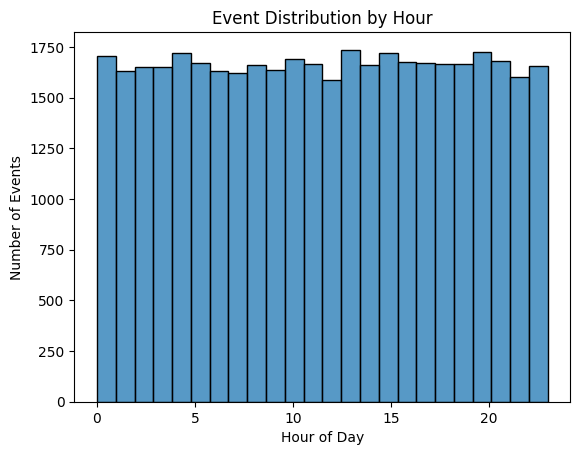

In [58]:
df['Hour'] = df['Timestamp'].dt.hour
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title("Event Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Events")
plt.show()


### Balanced Distribution: 
No significant concentration of events is observed in relation to specific hours of the day. This may suggest that the system operates with a similar load throughout the 24 hours or that the events are distributed randomly.

### Lack of Anomalies:
The chart does not show any sudden spikes or drops during specific time periods, indicating that there were no extraordinary events at particular hours or time-based anomalies.

### System Performance and User Behavior:
If these events represent user activities within a system, this could indicate that users are showing similar behaviors across different time periods.

### Further Specific Analysis:
- The types of events (e.g., successful logins or error logs) can be examined.
- External factors based on time periods (e.g., working hours, holidays) can be analyzed to better understand the reasons behind the distribution.


In [59]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


### Geolocation Analysis of IP Addresses
In this analysis, we are trying to get the geographic location information (latitude and longitude) based on the IP addresses in the dataset. But since the dataset I have is synthetic, it did not work, so I am leaving it as markdown. The following Python script uses the `Nominatim` geocoder of the `geopy` library to get the geographic coordinates associated with each IP address:s:

```python
from geopy.geocoders import Nominatim

def get_geolocation(ip):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(ip)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Let's get the geographic data of IPs in DataFrame
df['Geo'] = df['Source IP Address'].apply(get_geolocation)

# Let's keep the geographic data in two columns
df[['Latitude', 'Longitude']] = pd.DataFrame(df['Geo'].tolist(), index=df.index)

# Let's clean the NaN data
df = df.dropna(subset=['Latitude', 'Longitude'])


In [60]:
plt = px.histogram(df ,x='Geo-location Data', color = 'Attack Type', title = 'Number of Attack Types by Geo-Location')
plt.show()

Unique columns" are generally defined as columns that have a different value in each row. The impact of these columns can be understood by how they relate to or interact with other columns.

# b)Balanced Columns

In [61]:
# Let's identify the columns with 2 and 3 unique values
columns_with_2_unique = [col for col in df.columns if df[col].nunique() == 2]
columns_with_3_unique = [col for col in df.columns if df[col].nunique() == 3]

# Let's combine these columns
balanced_columns = columns_with_2_unique + columns_with_3_unique

# Now we have added the columns with both 2 and 3 unique values ​​in balanced_columns
print("Balanced Columns with 2 and 3 unique values:", balanced_columns)

Balanced Columns with 2 and 3 unique values: ['Packet Type', 'Attack Signature', 'Log Source', 'Protocol', 'Traffic Type', 'Attack Type', 'Action Taken', 'Severity Level', 'Network Segment']


AttributeError: 'Figure' object has no attribute 'title'

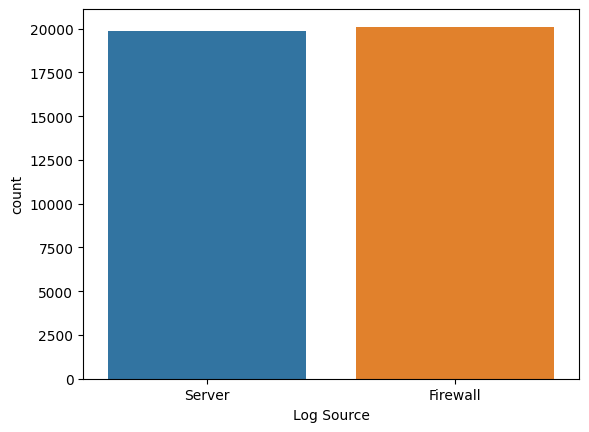

In [62]:
# Assuming df['Log Source'] contains the log source data
sns.countplot(x='Log Source', data=df)
plt.title('Log Source Distribution')
plt.xlabel('Log Source')
plt.ylabel('Count')
plt.show()

In [ ]:
segment_counts = df['Network Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Network Segment Distribution')
plt.show()

In [ ]:
sns.countplot(x='Attack Type', data=df)
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()


In [ ]:
sns.countplot(x='Attack Signature', data=df)
plt.title('Attack Signature Distribution')
plt.xlabel('Attack Signature')
plt.ylabel('Count')
plt.show()


In [ ]:
sns.countplot(x='Action Taken', data=df)
plt.title('Action Taken Distribution')
plt.xlabel('Action Taken')
plt.ylabel('Count')
plt.show()


In [ ]:
sns.countplot(x='Severity Level', data=df)
plt.title('Severity Level Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()


In [ ]:
sns.countplot(x='Protocol', data=df)
plt.title('Protocol Distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()


In [ ]:
sns.countplot(x='Packet Type', data=df)
plt.title('Packet Type Distribution')
plt.xlabel('Packet Type')
plt.ylabel('Count')
plt.show()


In [ ]:
sns.countplot(x='Traffic Type', data=df)
plt.title('Traffic Type Distribution')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()


# 3. Data Cleaning and Preprocessing

In [6]:
# Select and edit columns with two unique values
binary_columns = ['Log Source', 'Action Taken', 'Packet Type']
for col in binary_columns:
    df[col] = df[col].replace({df[col].unique()[0]: 0, df[col].unique()[1]: 1})  # Girinti eklendi

# Select and edit columns with three unique values
three_class_columns = ['Network Segment', 'Attack Type', 'Severity Level', 'Protocol', 'Traffic Type']
for col in three_class_columns:
    df[col] = LabelEncoder().fit_transform(df[col])  # Girinti eklendi


/tmp/ipykernel_30/4038524924.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({df[col].unique()[0]: 0, df[col].unique()[1]: 1})  # Girinti eklendi


In [8]:
# Change Pandas settings to avoid warning
pd.set_option('future.no_silent_downcasting', True)

# The code works the same
binary_columns = ['Log Source', 'Action Taken', 'Packet Type']
for col in binary_columns:
  df[col] = df[col].replace({df[col].unique()[0]: 0, df[col].unique()[1]: 1})

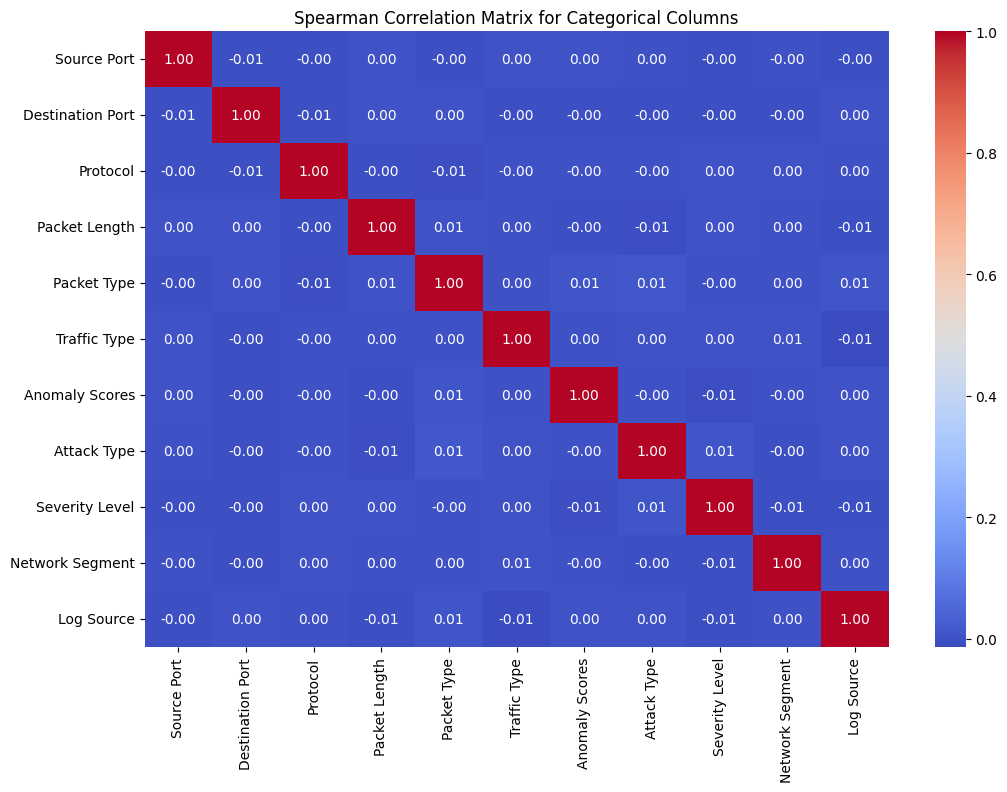

In [9]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr(method='spearman') # Alternative: method='kendall'

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Categorical Columns")
plt.show()

In [ ]:
# Total number of NaN in each column
print("\nNumber of NaN in each column:\n", df.isna().sum())

Finding Total Number of Missing (NaN) Values in Each Column¶
To gain a better understanding of the missing values in our dataset, we can find the total number of NaN values in each column. This helps us to identify which columns have missing data and how many values are missing.

In [10]:
columns_to_transform = ['Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Alerts/Warnings', 'Malware Indicators']

# Function to make NaN values ​​0 and other values ​​1
def transform_column(column):
 return column.apply(lambda x: 1 if pd.notna(x) else 0)

# Transform the specified columns
df[columns_to_transform] = df[columns_to_transform].apply(transform_column)

# Print the new dataset
print(df)

                 Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port  Protocol  Packet Length  Packet Type  \
0            31225             17616         0            503        

**EDA Process: Handling NaN Values and Data Transformations**

During the exploratory data analysis (EDA) process, several columns in the dataset contained missing (NaN) values. The NaN values were analyzed and transformed into more meaningful binary representations to prepare the data for further analysis and machine learning. The following transformations were applied:

1. **Malware Indicators**: The column contained 20,000 NaN values, which were replaced by 0. The "IoC Detected" entries were converted to 1, indicating detected indicators of compromise, while all other values (including NaN) were set to 0.

2. **Alerts/Warnings**: This column had 20,067 NaN values. The "Alert Triggered" entries were transformed into 1, indicating an alert was triggered. All other values, including NaN, were replaced with 0.

3. **Proxy Information**: With 19,851 NaN values, the missing entries were replaced with "No Proxy." Additionally, a new binary column, "Proxy Used," was created, where 1 indicates the use of a proxy and 0 indicates no proxy.

4. **Firewall Logs**: The column had 19,961 NaN values, which were replaced with "No Log" to indicate missing log data.

5. **IDS/IPS Alerts**: There were 20,050 NaN values in this column. These were replaced with "No Alert" to signify the absence of alerts during certain periods.

These transformations were applied to clean the data and make it more structured for subsequent analysis and modeling. Other columns without NaN values were left unchanged. The result is a dataset that is more consistent and ready for further analysis or machine learning tasks.


In [11]:
# Check if there is missing data (NaN)
missing_data = df.isnull().sum()

# Display the number of missing data
print("Missing data counts:\n", missing_data)

# Check if there is missing data in any column
missing_columns = missing_data[missing_data > 0]
if not missing_columns.empty:
   print("\nColumns with missing data:\n", missing_columns)
else:
   print("\nThere is no column with missing data.")

Missing data counts:
 Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

There is no column with missing data.


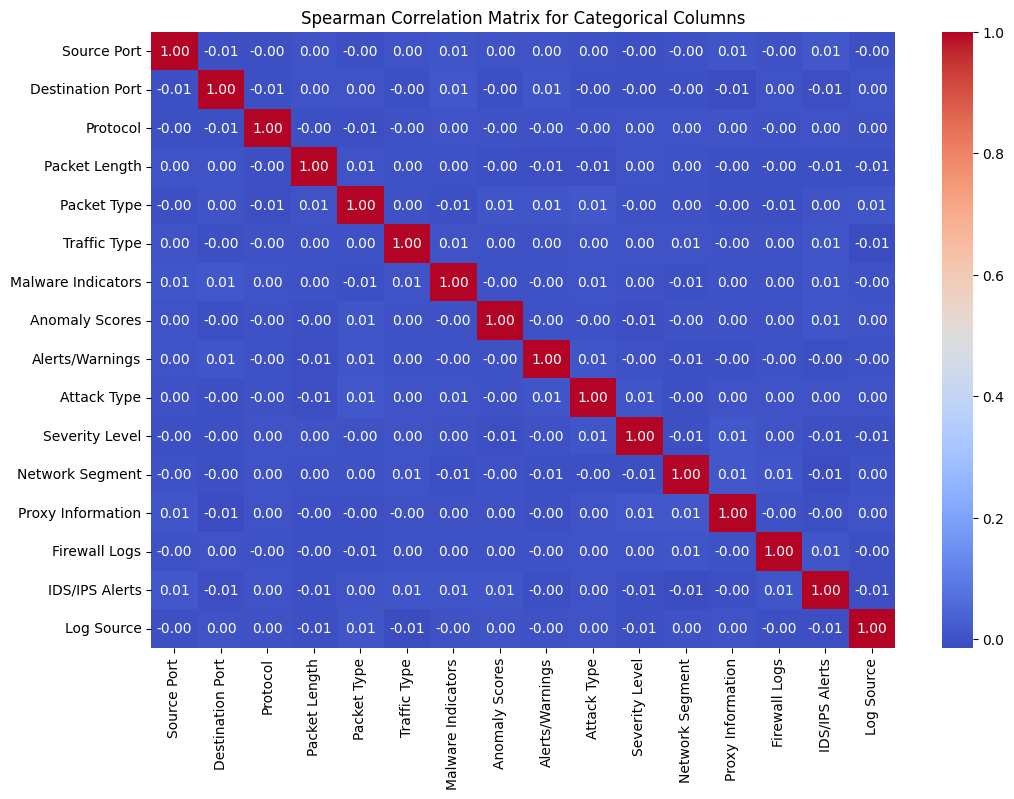

In [12]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr(method='spearman') 

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Categorical Columns")
plt.show()

# 4. Relational Analysis and Visualizations

**1. Anomaly Scores-Alerts/Warnings**

In [ ]:
#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alerts/Warnings', y='Anomaly Scores', data=df)
plt.title("Anomaly Scores vs Alerts/Warnings")
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anomaly Scores', y='Alerts/Warnings', data=df)
plt.title("Relationship Between Anomaly Scores and Alerts/Warnings")
plt.show()


General Comment:
According to the graphs, there is a strong relationship between Anomaly Scores and Alerts/Warnings, so it cannot be reached. For further analysis:

You can calculate the correlation.
You can examine the variation between these two variables with more complex models (e.g. logistic regression).
In particular, for a better understanding of the underlying graphical data, a "density graph" (density graph) or "heat map" can be used.

Instead of expecting a perfect relationship between Alerts/Warnings and Anomaly Scores, the following approaches may be more useful:

Rule and Score Analysis: Correlation and threshold analysis can be performed to understand which anomaly scores generate more alerts.
Understanding the Context: It should be clarified whether alerts are based solely on anomaly scores or are also affected by other factors (e.g. IDS/IPS rules).
Incorporating Other Features: Instead of limiting yourself to these two variables, you can also analyze network, device or user data to create a richer context.

**1. Attack-Related Variables**

This group provides information about the type and impact of attacks:

Attack Type: The basic variable for understanding attack typ
es.
Attack Signature: The attack signature; often a critical component in attack detect
ion.
Severity Level: To assess how critical the attac
k is.
Action Taken: To understand the actions taken against the attack and the consequences of the attack.

**Correlation Analysis: Relationship Between Severity Level and Action Taken**

In [ ]:
# Korelasyon analizi
severity_action_corr, p_value = spearmanr(df['Severity Level'], df['Action Taken'])
print(f"Severity Level ve Action Taken arasındaki korelasyon: {severity_action_corr}")
print(f"P-değeri: {p_value}")

# Scatterplot
sns.scatterplot(x='Severity Level', y='Action Taken', data=df)
plt.title('Severity Level ve Action Taken Arasındaki İlişki')
plt.xlabel('Severity Level')
plt.ylabel('Action Taken')
plt.grid(True)
plt.show()

The main message to take away from this graph is that there is no significant relationship between Severity Level and Action Taken.


**2.Anomaly and Warning Systems**

This group includes system-generated alerts and anomaly scores:

Anomaly Scores: Determines the degree of suspicious activity.
Alerts/Warnings: Alerts generated by the system based on anomaly scores.
IDS/IPS Alerts: Alerts from intrusion detection systems.

In [ ]:
# Example DataFrame with Anomaly Scores and IDS/IPS alerts
# Replace this with your actual dataset loading code
df = pd.DataFrame({
    'Anomaly Score': np.random.uniform(0, 100, 1000),  # Random example Anomaly Scores
    'IDS/IPS Alerts': np.random.choice([0, 1], size=1000)  # Random IDS/IPS alerts (0: No Alert, 1: Alert)
})

# 1. Calculate threshold values for anomaly scores using quantiles
q1 = df['Anomaly Score'].quantile(0.25)  # 1st quartile (low threshold)
q3 = df['Anomaly Score'].quantile(0.75)  # 3rd quartile (high threshold)
iqr = q3 - q1  # Interquartile range (IQR)

# Define thresholds for anomaly levels
low_threshold = q1 - 1.5 * iqr
high_threshold = q3 + 1.5 * iqr

# 2. Define a function to classify Alerts/Warnings based on Anomaly Score
def classify_alerts(anomaly_score):
    if anomaly_score < low_threshold:
        return 'Normal'  # Normal behavior
    elif anomaly_score >= low_threshold and anomaly_score < high_threshold:
        return 'Warning'  # Warning for moderate anomalies
    else:
        return 'Alert'  # Alert for high anomalies

# 3. Apply the function to the Anomaly Score column to classify alert levels
df['Alert Level'] = df['Anomaly Score'].apply(classify_alerts)

# 4. Correlate IDS/IPS Alerts with the generated Alert Level (optional, if needed)
df['IDS/IPS Alert'] = np.where(df['IDS/IPS Alerts'] == 1, 'Yes', 'No')

# 5. View the alert levels and IDS/IPS Alerts
print(df[['Anomaly Score', 'Alert Level', 'IDS/IPS Alert']].head())

# 6. Plotting the distribution of Alert Levels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Alert Level', data=df, palette='Set2')
plt.title('Alert Level Distribution Based on Anomaly Scores')
plt.xlabel('Alert Level')
plt.ylabel('Frequency')
plt.show()

# Plot IDS/IPS Alerts distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='IDS/IPS Alert', data=df, palette='Set1')
plt.title('IDS/IPS Alert Distribution')
plt.xlabel('IDS/IPS Alert')
plt.ylabel('Frequency')
plt.show()

If the IDS/IPS Alert is accompanied by a high anomaly score, there is a high probability of a real attack. If it is accompanied by a low anomaly score, it may be a false positive alert.

**3.Network graphs to map the interactions between Protocol, Packet Type, and Traffic Type across different Network Segments**

In [ ]:
# To visualize the distribution of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(df["Anomaly Score"], kde=True, bins=10, color="blue")
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

# Set threshold value (e.g. 50)
threshold = 50

# Separate categories according to threshold value
above_threshold = df[df["Anomaly Score"] > threshold]
below_threshold = df[df["Anomaly Score"] <= threshold]

# Analysis according to threshold value
print("Data above threshold value:")
print(above_threshold)

print("\nBelow threshold value data:")
print(below_threshold)

# Visualization by threshold category
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Anomaly Score"] > threshold, y=df["Anomaly Score"])
plt.title("Anomaly Scores Above and Below Threshold")
plt.xlabel("Above Threshold (True/False)")
plt.ylabel("Anomaly Score")
plt.show()

There may be more false positive alarms in our synthetic data.

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Yıl, Ay, Gün ve Saat gibi özellikler türetmek
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute


In [17]:
# Portları kategorilere ayırma
df['Source_Port_Category'] = df['Source Port'].apply(lambda x: 'HTTP' if x == 80 else 'FTP' if x == 21 else 'Other')


In [18]:
df.info

<bound method DataFrame.info of                 Timestamp Source IP Address Destination IP Address  \
0     2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1     2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2     2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3     2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4     2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                   ...               ...                    ...   
39995 2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996 2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997 2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998 2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999 2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port  Protocol  Packet Length  Packet Type  \
0            31225             17616         0   

In [41]:
df['Is_Weekend'] = df['Day'].apply(lambda x: 1 if x in [6, 7] else 0)


In [39]:
df['Time_of_Day'] = df['Hour'].apply(lambda x: 'Morning' if x < 12 else ('Afternoon' if x < 18 else 'Evening'))


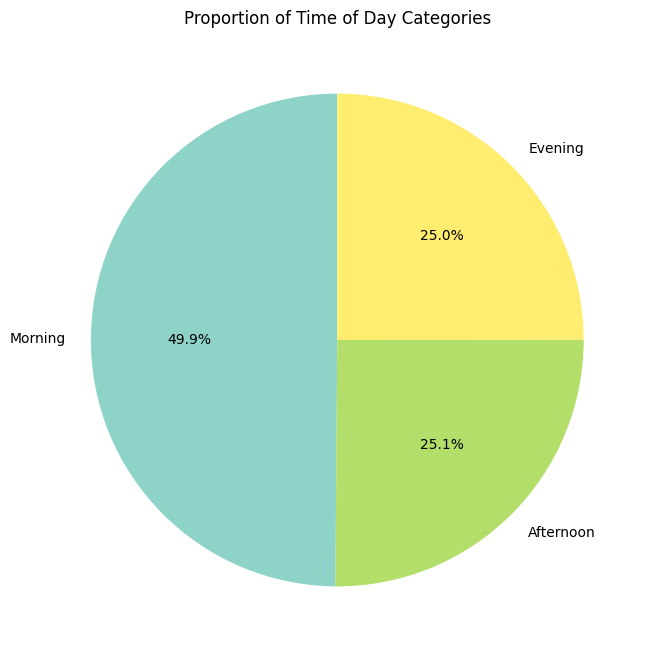

In [24]:

time_of_day_counts = df['Time_of_Day'].value_counts()

plt.figure(figsize=(8, 8))
time_of_day_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title('Proportion of Time of Day Categories')
plt.ylabel('')  # Y eksenini gizleme
plt.show()



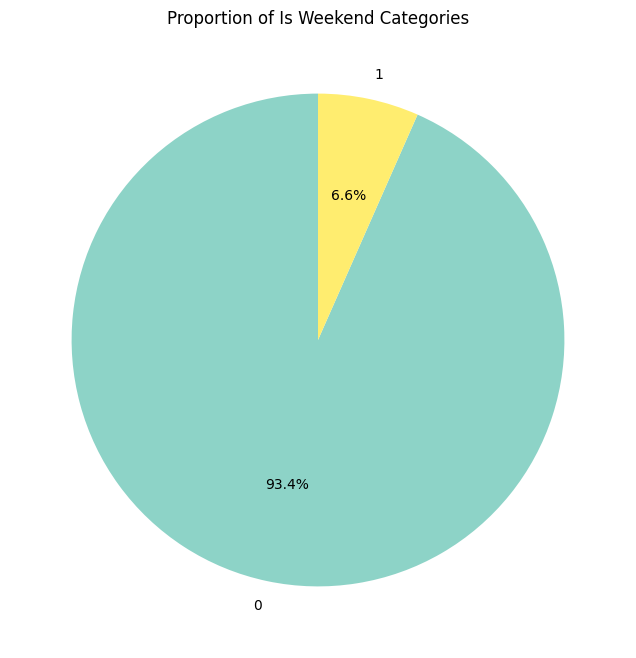

In [26]:

counts = df['Is_Weekend'].value_counts()

plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title('Proportion of Is Weekend Categories')
plt.ylabel('')  # Y eksenini gizleme
plt.show()


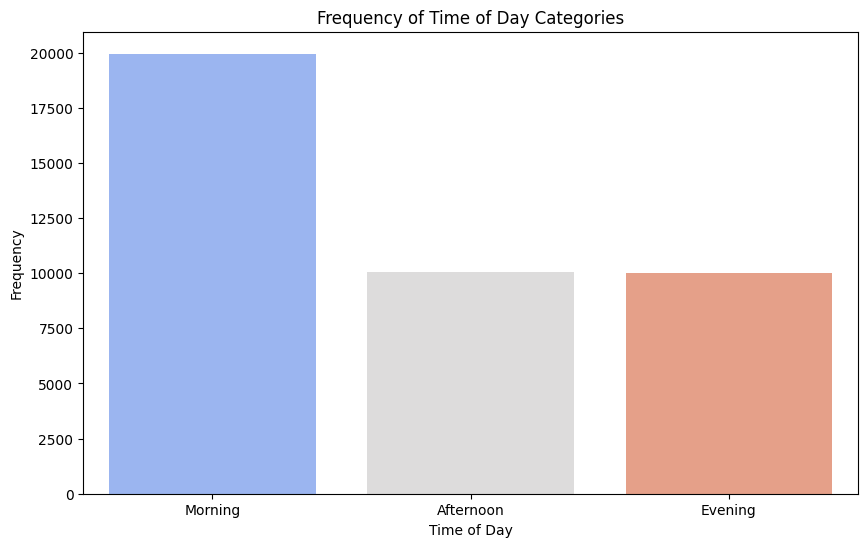

In [27]:


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time_of_Day', palette='coolwarm')
plt.title('Frequency of Time of Day Categories')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.show()


In [43]:

print(df.columns)


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Source_Port_Category',
       'Is_Weekend', 'Time_of_Day'],
      dtype='object')


In [44]:
# Silmek istediğiniz sütunları bir liste olarak belirtin
columns_to_drop = ['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Source_Port_Category']

# Bu sütunları veri setinden silin
df_cleaned = df.drop(columns=columns_to_drop)

# Sonuç olarak kalan sütunları görmek
print(df_cleaned.columns)


Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Is_Weekend',
       'Time_of_Day'],
      dtype='object')


In [45]:
# Time_of_Day sütununu sayısal verilere dönüştür
df['Time_of_Day'] = df['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2})

# Yeni verinizi kontrol edin
print(df[['Hour', 'Time_of_Day']].head())


   Hour  Time_of_Day
0     6            0
1     7            0
2     8            0
3    10            0
4    13            1


In [46]:
df.info

<bound method DataFrame.info of                 Timestamp Source IP Address Destination IP Address  \
0     2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1     2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2     2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3     2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4     2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                   ...               ...                    ...   
39995 2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996 2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997 2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998 2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999 2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port  Protocol  Packet Length  Packet Type  \
0            31225             17616         0   

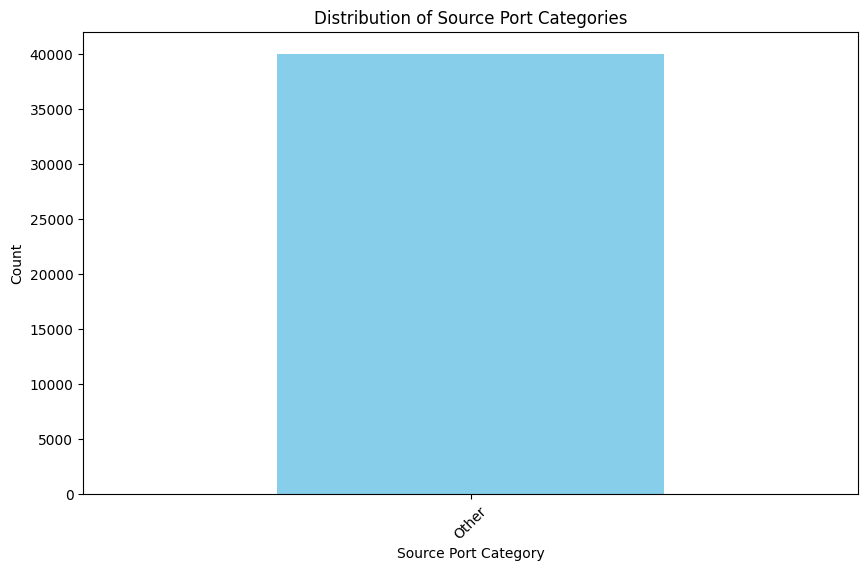

In [47]:


# Assuming 'df' is your DataFrame and 'Source_Port_Category' is a column in it
category_counts = df['Source_Port_Category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Source Port Categories')
plt.xlabel('Source Port Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [48]:
# Drop the 'Source_Port_Category' column
df = df.drop('Source_Port_Category', axis=1)

# Check if the column is removed
print(df.columns)


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Is_Weekend', 'Time_of_Day'],
      dtype='object')


In [49]:
# Drop the specified columns
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Timestamp'], axis=1)

# Check if the columns are removed
print(df.columns)


Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Is_Weekend',
       'Time_of_Day'],
      dtype='object')


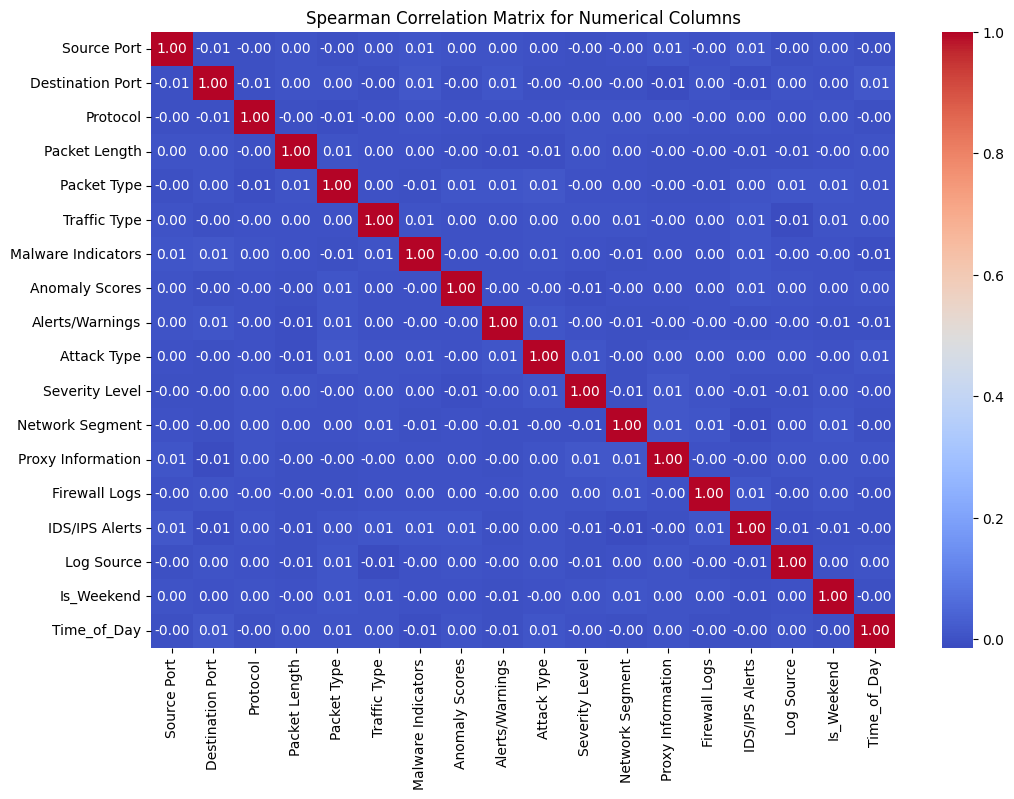

In [50]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()


In [51]:
# Convert IP addresses to numeric using a hash function
df['Source_IP_numeric'] = df['Source IP Address'].apply(lambda x: hash(x))
df['Destination_IP_numeric'] = df['Destination IP Address'].apply(lambda x: hash(x))

# Display the first few rows to check
print(df[['Source_IP_numeric', 'Destination_IP_numeric']].head())


     Source_IP_numeric  Destination_IP_numeric
0  7071886614479303802     8463732519633261228
1  7921602880414716583     8147285952923590035
2 -4921770030930637407     8255816659438833872
3 -8733443760941130564    -4174719075219220550
4  8457856714363464764     5269856916523120990


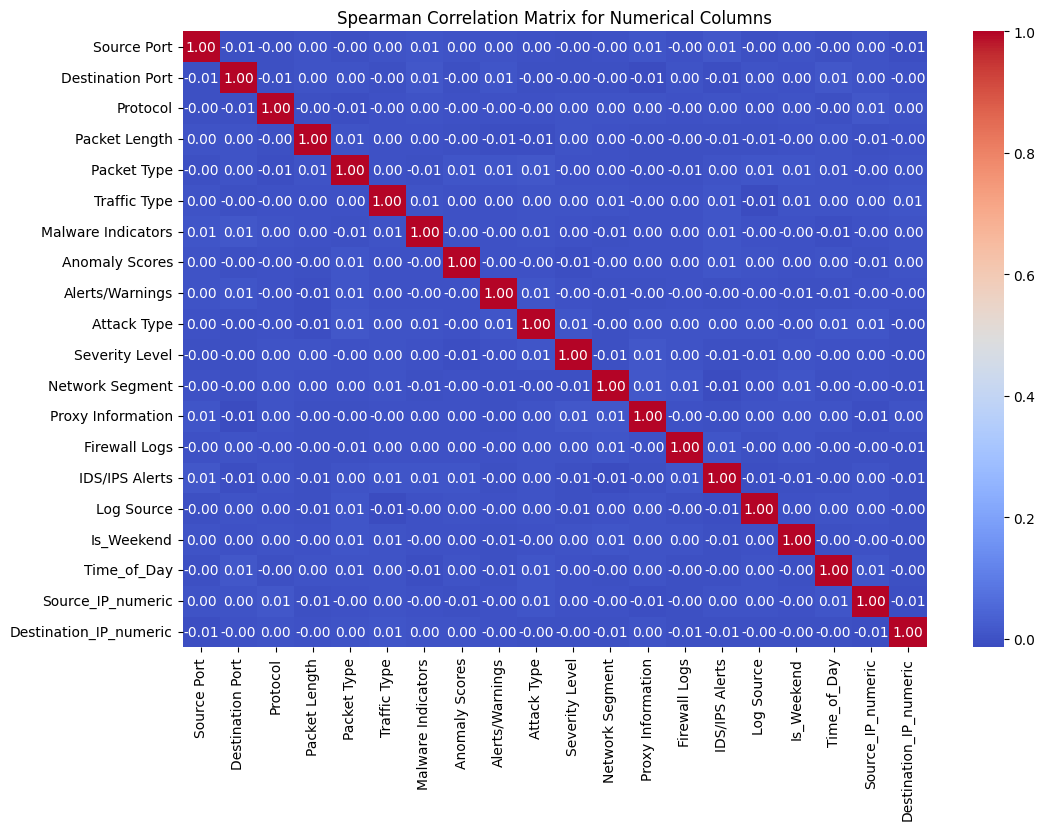

In [52]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()

In [53]:
# Hash Geo-location Data to numeric values
df['Geo_location_numeric'] = df['Geo-location Data'].apply(lambda x: hash(x))

# Check the result
print(df[['Geo-location Data', 'Geo_location_numeric']].head())


    Geo-location Data  Geo_location_numeric
0  Jamshedpur, Sikkim  -8999411680169358688
1  Bilaspur, Nagaland   6975626019938638136
2   Bokaro, Rajasthan  -1627470683963408106
3  Jaunpur, Rajasthan  -8090321408525160821
4  Anantapur, Tripura  -3788332244823905854


In [54]:
# Hash User Information to numeric values
df['User_numeric'] = df['User Information'].apply(lambda x: hash(x))

# Check the result
print(df[['User Information', 'User_numeric']].head())


  User Information         User_numeric
0    Reyansh Dugal   117885271600246290
1       Sumer Rana  5002290135711609678
2     Himmat Karpe -5134170841085345563
3       Fateh Kibe -6973760060209610099
4     Dhanush Chad -3113992890869337662


In [55]:
# Hash Device Information to numeric values
df['Device_numeric'] = df['Device Information'].apply(lambda x: hash(x))

# Check the result
print(df[['Device Information', 'Device_numeric']].head())


                                  Device Information       Device_numeric
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ... -9067518487590909381
1  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ... -3762916097625313352
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...  1607844611753520636
3  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...  9160638309836350836
4  Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...  5408607688243517413


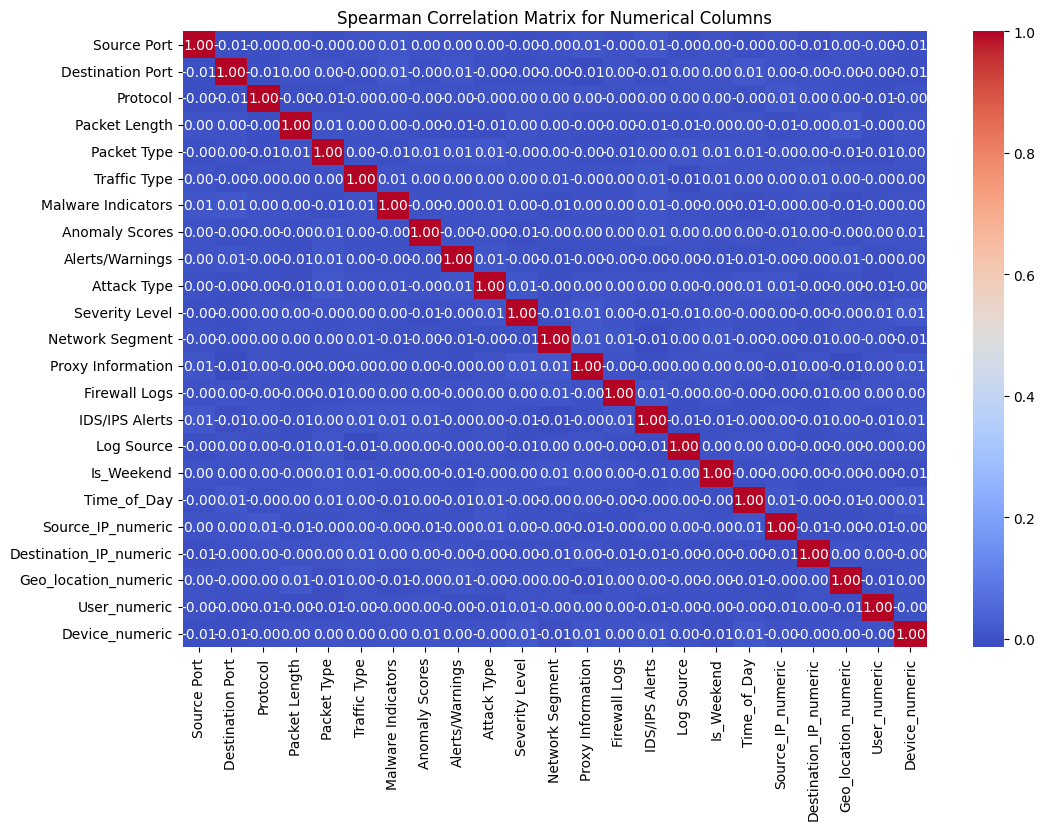

In [56]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()

In [59]:
print(df.columns)

Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Is_Weekend',
       'Time_of_Day', 'Source_IP_numeric', 'Destination_IP_numeric',
       'Geo_location_numeric', 'User_numeric', 'Device_numeric'],
      dtype='object')


In [60]:
# Dropping the specified columns
df = df.drop(columns=['User Information', 'Device Information', 'Geo-location Data', 'Source IP Address', 'Destination IP Address'])

# Checking the updated columns
df.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'Network Segment',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Is_Weekend', 'Time_of_Day', 'Source_IP_numeric',
       'Destination_IP_numeric', 'Geo_location_numeric', 'User_numeric',
       'Device_numeric'],
      dtype='object')

In [61]:
import hashlib

# Function to apply SHA-256 hash and convert it to a numeric value
def hash_to_numeric(payload):
    # Hash the payload using SHA-256
    hash_object = hashlib.sha256(str(payload).encode('utf-8'))
    # Convert the hash to a numeric value (integer)
    return int(hash_object.hexdigest(), 16)

# Apply the hash_to_numeric function to the 'Payload Data' column
df['Payload Data Numeric'] = df['Payload Data'].apply(hash_to_numeric)

# Verify the result
df['Payload Data Numeric'].head()


0    4899153114110817386972601664735745800208891387...
1    7225178957609577232040602224949875146410476970...
2    5937069448476261175860425784298222222393652752...
3    1014803480873819039264563698751541379182632104...
4    5757593075077058702383739378849370581489202318...
Name: Payload Data Numeric, dtype: object

In [62]:
print(df.columns)

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'Network Segment',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Is_Weekend', 'Time_of_Day', 'Source_IP_numeric',
       'Destination_IP_numeric', 'Geo_location_numeric', 'User_numeric',
       'Device_numeric', 'Payload Data Numeric'],
      dtype='object')


In [63]:
# Dropping the specified columns
df = df.drop(columns=['Payload Data'])

# Checking the updated columns
df.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Is_Weekend',
       'Time_of_Day', 'Source_IP_numeric', 'Destination_IP_numeric',
       'Geo_location_numeric', 'User_numeric', 'Device_numeric',
       'Payload Data Numeric'],
      dtype='object')

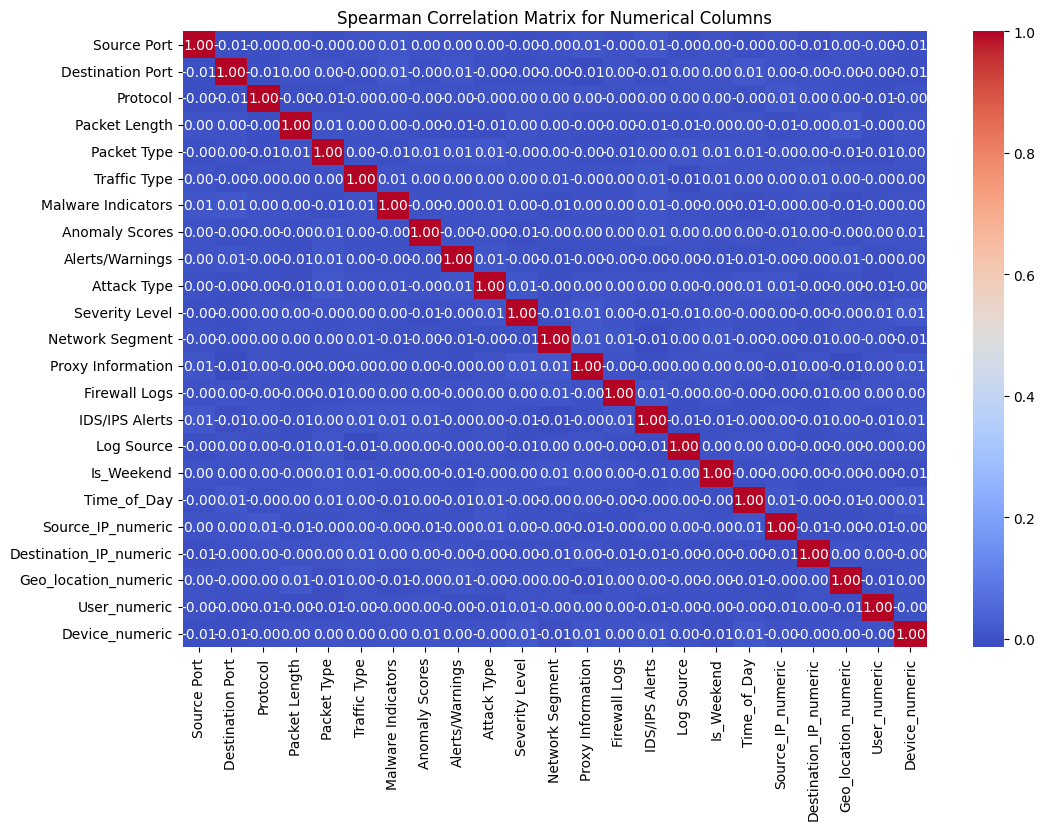

In [64]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()

In [69]:
from sklearn.cluster import KMeans

# KMeans Kümeleme uygulaması ve açıkça n_init parametresini belirleme
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Sonuçları kontrol etme
df[['Source_IP_numeric', 'Destination_IP_numeric', 'Geo_location_numeric', 
    'User_numeric', 'Device_numeric', 'Payload Data Numeric', 'Cluster']].head()



,Source_IP_numeric,Destination_IP_numeric,Geo_location_numeric,User_numeric,Device_numeric,Payload Data Numeric,Cluster
0,1.334702,1.587237,-1.685431,0.021960,-1.702091,4899153114110817386972601664735745800208891387...,0
1,1.494517,1.527612,1.331286,0.941917,-0.704436,7225178957609577232040602224949875146410476970...,4
2,-0.921068,1.548062,-0.293318,-0.967242,0.305662,5937069448476261175860425784298222222393652752...,0
3,-1.637969,-0.794101,-1.513759,-1.313721,1.726141,1014803480873819039264563698751541379182632104...,2
4,1.595376,0.985447,-0.701374,-0.586750,1.020484,5757593075077058702383739378849370581489202318...,0


In [70]:
cluster_summary = df.groupby('Cluster')[['Source_IP_numeric', 'Destination_IP_numeric', 'Geo_location_numeric', 
                                         'User_numeric', 'Device_numeric', 'Payload Data Numeric']].mean()
print(cluster_summary)


         Source_IP_numeric  Destination_IP_numeric  Geo_location_numeric  \
Cluster                                                                    
0                -0.015079                0.007214             -0.000573   
1                -0.007199               -0.009027              0.007693   
2                 0.021539                0.008355             -0.006274   
3                 0.007450                0.004050             -0.000428   
4                -0.006286               -0.010293             -0.000302   

         User_numeric  Device_numeric  \
Cluster                                 
0           -0.003911        0.007474   
1           -0.006637        0.026449   
2            0.013954       -0.037650   
3            0.000128       -0.001885   
4           -0.003497        0.005729   

                                      Payload Data Numeric  
Cluster                                                     
0        5736400294066408806906411466968358498709564589..

In [71]:
# Küme sütununu modelinizde özellik olarak kullanma
X = df.drop(columns=['Cluster'])
y = df['Cluster']


Identify Target Groups: Clustering allows you to segment groups in your dataset. You can use these clusters to create target groups for marketing, user behavior, security measures, or other analyses. For example, when identifying security threats, anomalous behaviors in certain clusters can be prioritized.

Using with Machine Learning Models: You can use clustering results as features in your machine learning models. Clusters can be used for feature engineering before labeling. For example, the "Cluster" column can be converted into a feature in your model and used in classification, regression, or anomaly detection models.

In [74]:
print(df.columns)

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Is_Weekend',
       'Time_of_Day', 'Source_IP_numeric', 'Destination_IP_numeric',
       'Geo_location_numeric', 'User_numeric', 'Device_numeric',
       'Payload Data Numeric', 'Cluster'],
      dtype='object')


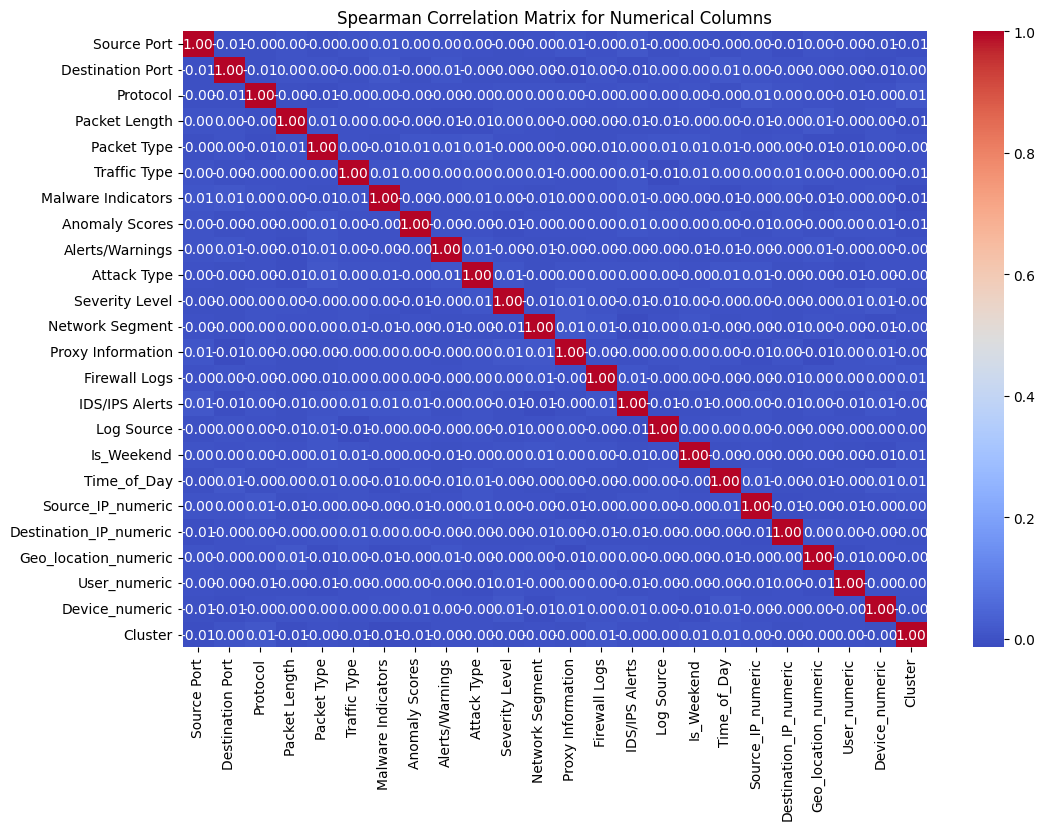

In [75]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix using Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix for Numerical Columns")
plt.show()

**Overall Assessment:**
These clusters can help reveal similarities and differences in data. Clusters provide the opportunity to further analyze these different groups by grouping observations with similar characteristics, such as specific geographic regions, user types, device types, or payload data.
Each cluster can be associated with a specific behavior or set of characteristics. For example, cluster 0 could be data from users with specific geographic areas and lower device characteristics. Cluster 4 could be data with higher geographic, user, and device characteristics. These clusters can be used for more advanced analysis, such as examining user behavior or seeing the geographic distribution of device types.
Such analysis can be used to develop more targeted strategies, such as in cybersecurity, grouping similar IP addresses and payload data to analyze the source of network attacks.

Comment:
Source and Destination IPs (Source_IP_numeric, Destination_IP_numeric):

We observe that the numeric representations of Source IP and Destination IP are in different ranges. This indicates that each IP address is represented in a different numeric format and that both IP addresses have different characteristics.
We see that these values ​​vary greatly between observations in different clusters (e.g., cluster 0, cluster 4, etc.). This may indicate that certain source and destination IP addresses are concentrated in certain clusters.
Geolocation (Geo_location_numeric):

The numeric representations of geographic location also vary in different clusters. This indicates that data belonging to geographically different regions are grouped and the clustering algorithm takes such information into account.

For example, observations belonging to cluster 0 show a negative Geo_location_numeric value (e.g., -1.685431), whereas cluster 4 shows a more positive value (1.331286). This may indicate that data from different geographic regions or locations are clustered.

User, Device, and Payload Data (User_numeric, Device_numeric, Payload Data Numeric):

Other numeric representations such as user information, device information, and payload data also differ across clusters.

For example, in the observation in cluster 4, the "User_numeric" value is 0.941917, and the "Device_numeric" value is -0.704436. This indicates that the observations in cluster 4 may have different characteristics based on user and device types.
Cluster Distribution:

Cluster 0 has lower "Geo_location_numeric" and "Device_numeric" values, while cluster 4 shows higher values. This indicates that observations in certain clusters have similar characteristics and that the clustering algorithm groups data with similar characteristics into clusters.
Cluster 0 also stands out with its lower "Payload Data Numeric" values, which may indicate that the data belonging to this cluster can be associated with a certain type of payload.

General Evaluation:
These clusters can help reveal similarities and differences in data. Clusters provide the opportunity to perform further analysis on these different groups by grouping observations with similar characteristics, such as specific geographic regions, user types, device types, or payload data.
Each cluster can be associated with a specific behavior or feature set. For example, cluster 0 could be data from users with specific geographic areas and lower device characteristics. Cluster 4 could be data with higher geographic, user, and device characteristics. These clusters can be used for more advanced analysis, such as examining user behavior or seeing the geographic distribution of device types.
Such analysis can be used to develop more targeted strategies, such as grouping similar IP addresses and payload data to analyze the source of network attacks in cybersecurity.

# 6. Conclusion and Recommendations

**Dataset Review and Analysis**
The dataset contains 25 columns of data related to network traffic and attacks. At the beginning of this data, 4 of them were numeric and the rest were object data. First, let me examine the statistical values ​​of the numeric data. Then, I classified the object data according to whether they were unique. I converted all of the unique data into numeric with hash, applied categorical encoding to balanced data, and examined and organized the object data containing NaN. It is currently completely numeric and processed numerically.

beled data.

**Data Preprocessing:**
In this section, I saw that there was no one-to-one relationship in my dataset and divided the Timstap column into pieces to obtain new features. We had converted the unique columns into numeric with hash, and I analyzed them again using clustering. And I created my final dataset.

**Model Selection and Usage**

* Clustering Algorithms: Algorithms such as KMeans or DBSCAN can be used to group network traffic data and detect attacks. Such clustering methods can be effective in identifying anomalies or unusual behaviors.
* Classification Algorithms: If labeled data is available, attack types can be predicted using models such as Logistic Regression, SVM, or Random Forests.
* Anomaly Detection: Models such as Isolation Forest or Autoencoder can detect anomalous network behaviors by working with new unlabeled data.
data.

**Project Scenario**
 This dataset can be used to detect cyber attacks in network traffic for a security company. The main goal is to identify abnormal network traffic and detect potential security breaches in a timely manner.
Algorithm Selection
1. Clustering: It may be useful to identify abnormal situations by grouping network traffic data with KMeans or DBSCAN.
2. Classification: It is recommended to predict attack types using models such as Logistic Regression, SVM or Random Forest.
3. Anomaly Detection: You can detect abnormal situations by working with new, unlabeled data with Isolation Forest or Autoencoder.

This model can provide a powerful threat detection tool for a company in the field of network security.
urity.